In [302]:
#Detecção de rostos com OpenCv utilizando o algoritmo Viola-Jones

In [303]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [304]:
imagem1 = cv2.imread(r'd:\dataset\face_images\image1.jpg', 0)
imagem2 = cv2.imread(r'd:\dataset\face_images\image2.jpg', 0)

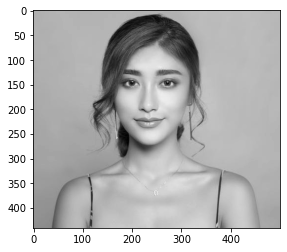

In [305]:
plt.imshow(imagem1, cmap='gray')

In [306]:
#Para encontrar o caminho do algoritmo CascadeClassifier()
cv2.data.haarcascades

'D:\\anaconda\\lib\\site-packages\\cv2\\data\\'

In [307]:
#Para detecção de faces, usar o arquivo haarcascade_frontalface_default.xml
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#Para detectar uma face dentro da imagem utilizar detectMultiscale()

In [308]:
def detect_face (image): 
    face_image = image.copy()
    face_rectangle = face_detector.detectMultiScale(face_image)
    for (x,y,width, height) in face_rectangle: 
        cv2.rectangle(face_image, (x,y), (x+width, y+height), (255,255,255), 8)
    return face_image

In [309]:
detection_result = detect_face(imagem1)

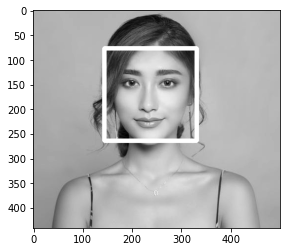

In [310]:
plt.imshow(detection_result, cmap='gray')

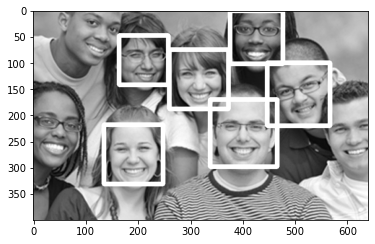

In [311]:
detection_result = detect_face(imagem2)
plt.imshow(detection_result, cmap='gray')

In [312]:
#Usando um classificador mais preciso haarcascade_frontalface_alt

face_detector = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_alt.xml')

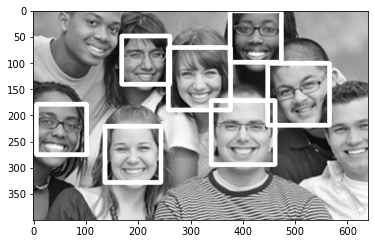

In [313]:
def detect_face (image): 
    face_image = image.copy()
    face_rectangle = face_detector.detectMultiScale(face_image)
    for (x,y,width,height) in face_rectangle: 
        cv2.rectangle(face_image, (x,y), (x+width, y+height), (255,255,255),8)
    return face_image

detection_result = detect_face(imagem2)
plt.imshow(detection_result, cmap='gray')

Detecção de olhos

In [314]:
eye_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [315]:
def detect_eye(image): 
    face_image = image.copy()
    face_rectangle = eye_detector.detectMultiScale(face_image)
    for(x,y,width,height) in face_rectangle:
        cv2.rectangle(face_image,(x,y), (x+width,y+height), (255,255,255), 8)
    return face_image

In [316]:
detection_result = detect_eye(imagem1)

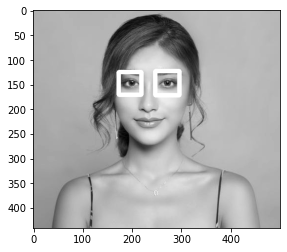

In [317]:
plt.imshow(detection_result, cmap='gray')

Detecção de olhos em várias pessoas

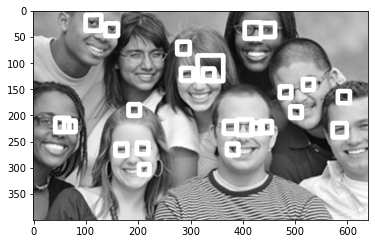

In [318]:
detection_result = detect_eye(imagem2)
plt.imshow(detection_result, cmap = 'gray')

Para evitar detectar objetos errados, atulizar os valores dos atributos scaleFactor e minNeighbours do método MultiScale()

In [319]:
def detect_eye (image): 
    face_image = image.copy()
    face_rectangle = eye_detector.detectMultiScale(face_image, scaleFactor=1.2, minNeighbors = 4)
    for (x,y,width, height) in face_rectangle: 
        cv2.rectangle(face_image,(x,y), (x+width, y+height), (255,255,255), 8)
    return face_image

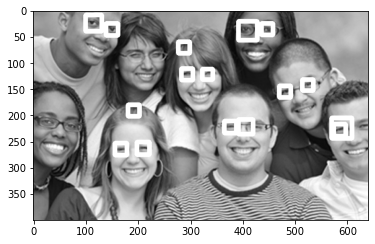

In [320]:
detection_result = detect_eye(imagem2)
plt.imshow(detection_result, cmap='gray')

Detecção de sorriso

In [321]:
smile_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

In [322]:
def detect_smile(image):
    face_image = image.copy()
    face_rectangle = smile_detector.detectMultiScale(face_image)
    for (x,y, width, height) in face_rectangle: 
        cv2.rectangle(face_image,(x,y),(x+width, y+height), (255,255,255),8)
    return face_image

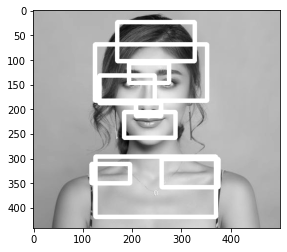

In [323]:
detection_result = detect_smile(imagem1)
plt.imshow(detection_result, cmap='gray')

Modificar os parâmetros scaleFactor, minNeighbour

In [328]:
def detect_smile(image):
    face_image = image.copy()
    face_rectangle = smile_detector.detectMultiScale(face_image, scaleFactor = 2.0, minNeighbors = 20)
    for (x, y, width, height) in face_rectangle: 
        cv2.rectangle(face_image, (x,y), (x+width, y+height), (255,255,255), 8)
    return face_image

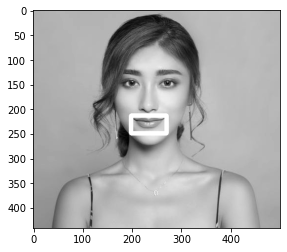

In [329]:
detection_result = detect_smile(imagem1)
plt.imshow(detection_result, cmap='gray')

Detecção de lábios

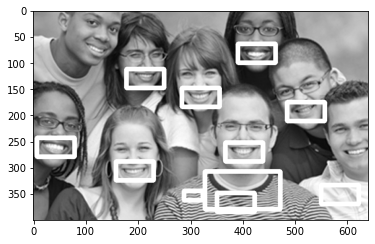

In [330]:
detection_result = detect_smile(imagem2)
plt.imshow(detection_result, cmap = 'gray')


Detectar imagem em vídeos 

In [332]:
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
def detect_face (image): 
    face_image = image.copy()
    face_rectangle = face_detector.detectMultiScale(face_image)
    for (x,y,width, height) in face_rectangle: 
        cv2.rectangle(face_image, (x,y), (x+width, y+height), (255,255,255), 8)
    return face_image


In [333]:
live_cam = cv2.VideoCapture(0)
while True: 
    ret, current_frame = live_cam.read(0)
    current_frame = detect_face(current_frame) 
    cv2.imshow("Face detected", current_frame)
    key = cv2.waitKey(50)
    if key == ord('q'): 
        break 
live_cam.release()
cv2.destroyAllWindows()